# Introduction
This notebook is a personal exploration of an end-to-end data science process and serves as a learning process for myself as I continue to pursue a career in data science. <br>

The challenge is based on the Kaggle Titanic Competition that provides a dataset with different passenger attributes together with their survival status of the shipwreck. The aim is to develop a model capable of predicting passenger survival.



## Table of Contents 
Note: I can't get links to work 😡

[1. Exploratory Data Analysis](#explore) <br>
> [1.1 Preliminary observations](#prelim_explore) <br>
   [1.2 Exploring numerical attributes](#explore_num_columns) <br>
   [1.3 Exploring categorical attributes](#explore_cat_columns)  <br>
   [1.4 Univariate Analysis](#explore_cat_columns)  <br>
   [1.5 Bivariate Analysis](#explore_cat_columns)  <br>


### Imports

In [1]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Input

In [2]:
# !unzip data/titanic.zip -d data/

test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")
pd.set_option("display.max_rows", None)

# 1. Exploratory Data Analysis
Objectives:
- Gain a preliminary understanding of available data
- Check for missing or null values
- Find potential outliers
- Assess correlations amongst attributes/features
- Check for data skew

[Back to contents](#top)

## 1.1 Preliminary observations
Examples from the dataset are shown below. <br><br>
[Back to contents](#top)

In [3]:
print("train: ", train_data.shape)
train_data.head(5)

train:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("test: ", test_data.shape)
test_data.head(5)

test:  (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Unique columns of train: ", set(train_data.columns) - set(test_data.columns))
print("Unique columns of test: ", set(test_data.columns) - set(train_data.columns))

Unique columns of train:  {'Survived'}
Unique columns of test:  set()


In [6]:
print(train_data.dtypes)
print(test_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Initial observations show that the test dataset holds the same attributes as the train dataset with "Survived" ommitted. Test data is likely a subset of an original dataset with all passengers included. (This is infact the case stated in the competition explanation. I still checked to simulate a scenario where this is unknown)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Numerical Columns from train_data

In [8]:
# List of numerical features
num_features = train_data.select_dtypes(exclude='object').copy()
num_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [9]:
len(num_features.columns)

7

In [10]:
num_features.describe().round(decimals=2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### Categorical Columns from train_data

In [11]:
# List of categorical features
cat_features = train_data.select_dtypes(include='object').copy()
cat_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [12]:
len(cat_features.columns)

5

In [13]:
cat_features.describe().round(decimals=2)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [14]:
train_data.isna().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

Notes for Data Cleaning & Processing:

3 features have missing values:
- Cabin
    - Likely drop this feature as 77% of the values are missing. This would have several adverse affects when training the model if I populated with synthetic information.
    - There is not enough organic data to provide the model with meaningful insights.
    - I may introduce skew into the final results.
    - Risk of overfitting with the 23% of real data.
- Age
    - Will populate the missing values. I feel this feature intuitively would be important for a person's survival rate. Younger = stronger and healthier. 
    - I could either use mean, median, or predict an age with other correlated features.
    - Using mean may introduce bias, variance shrinkage, and correlation distortion.
    - Using median is a better alternative as it limits the variance shrinkage, keeping the importance of higher variance data points.
    - Using a predictor such as KNN Imputation to give a best estimate would be the best solution.
- Embarked
    - This features signifies what port a passenger boarded the Titanic. Inherently, I don't feel this feature is that important due to the fact all passengers end up in the same shipwreck scenario. Although it could cause effects such as a person being more fatigued when boarding at a later port. 
    - I can either remove the rows with missing data, but I want to keep as much data of the other features as possible. The other solution is to populate the missing values with the most popular port of embarkment. Similar effects would occur as stated in the "Age" portion above, but given only 0.2% of data is missing, the effects would be minimal.

## 1.2 Univariate Analysis

[Back to contents](#top)

### Target Column
First, it is good practice to evaluate the skew of the target column as it may adversely affect the outcome of the prediction accuracy of regression models. This is not required (or possible) for our dataset as the target is a binary variable.

Note: Correcting skew is important for Linear Regression, but not necessary for Decision Trees and Random Forests.

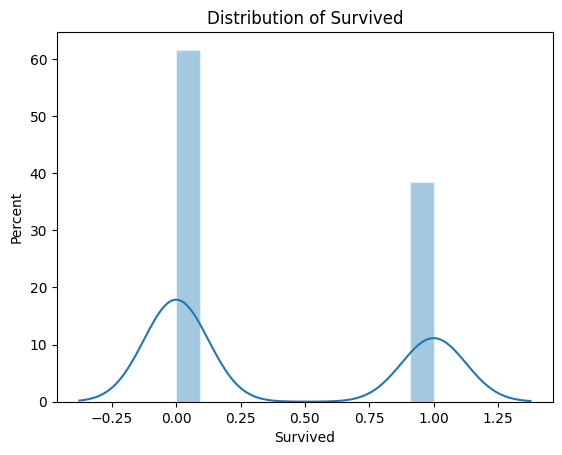

In [15]:
plt.figure()
sns.histplot(
    train_data.Survived, kde=True,
    stat="percent", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)
plt.title('Distribution of Survived')
plt.show()

### Numerical Features

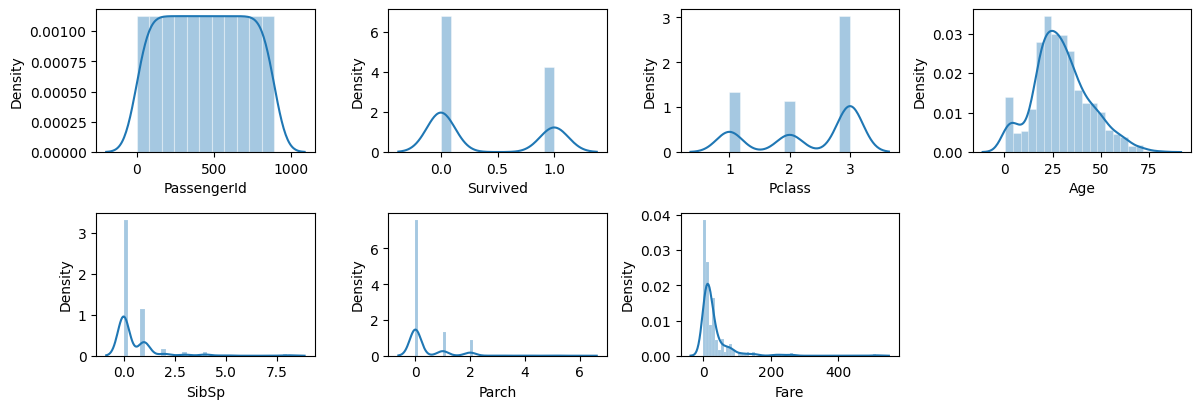

In [16]:
fig = plt.figure(figsize=(12,18))
for i in range(len(num_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.histplot(
    num_features.iloc[:,i].dropna(), kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)
    plt.xlabel(num_features.columns[i])

plt.tight_layout(pad=1.0)

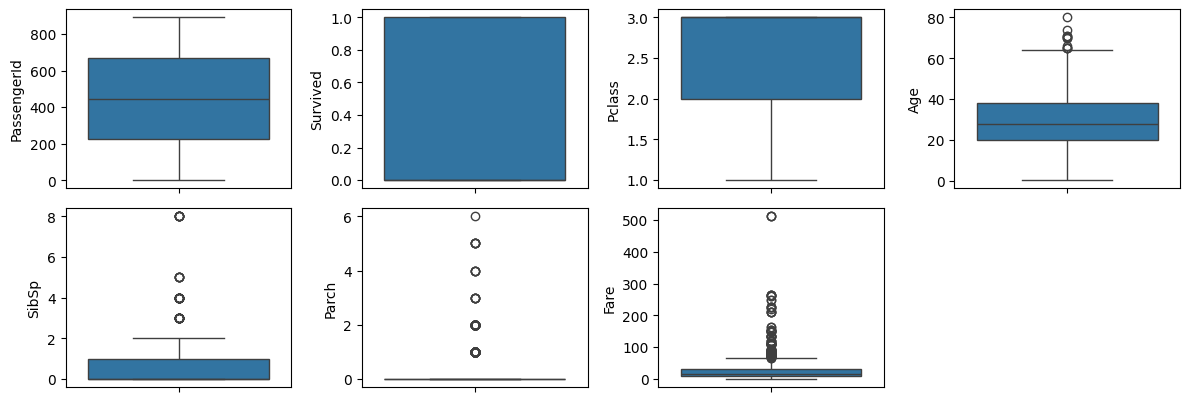

In [17]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_features.iloc[:,i])

plt.tight_layout()

In [18]:
train_data.loc[[train_data['SibSp'].idxmax(), train_data['Fare'].idxmax()]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


Notes for Data Cleaning & Processing:

There are two noticable outliers in the SibSp and Fare features. 
- Thomas Henry Sage has 8 siblings on board.
- Anna Ward paid an extraordinary amount of money ($512) for her ticket.

I can train the model multiple times trying different methods to improve the accuracy:
- Do nothing, train on original data.
- Remove the rows.
- Log transform the features given they are right skewed.


### Categorical Features

In [19]:
cat_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

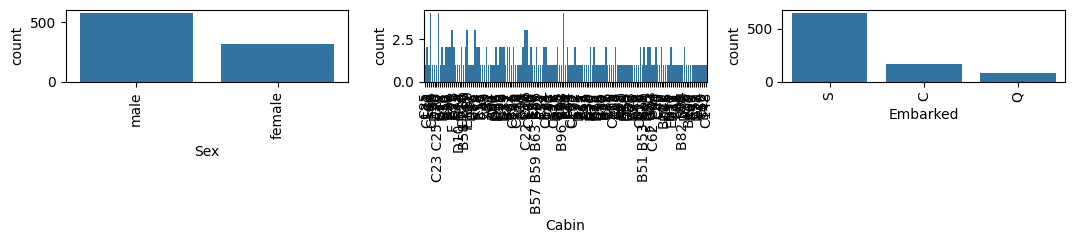

In [20]:
cat_features_visual = cat_features[['Sex', 'Cabin', 'Embarked']]

fig = plt.figure(figsize=(18,20))
for index in range(len(cat_features_visual.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_features_visual.iloc[:,index], data=cat_features_visual.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

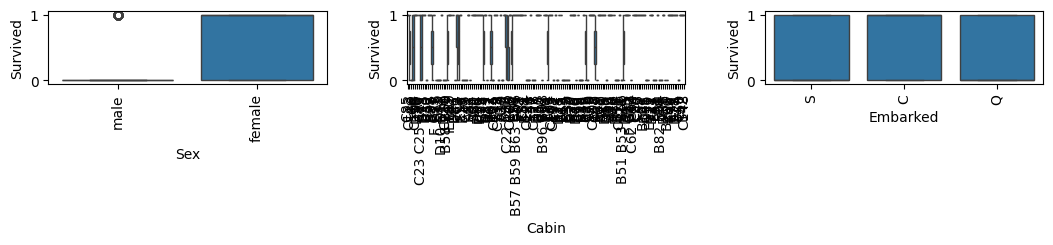

In [21]:
fig = plt.figure(figsize=(18,20))
for index in range(len(cat_features_visual.columns)):
    plt.subplot(9,5,index+1)
    sns.boxplot(y=train_data.Survived, x=cat_features_visual.iloc[:,index])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

Notes for Data Cleaning & Processing:

Looking at the categorical variables, none of the features heavily skew out of the norm.

Sex seems to be a very important feature on the survival rate of the passenger.

## 1.3 Bivariate Analysis

[Back to contents](#top)

### Correlation Matrix

<Axes: title={'center': 'Correlation of numerical attributes'}>

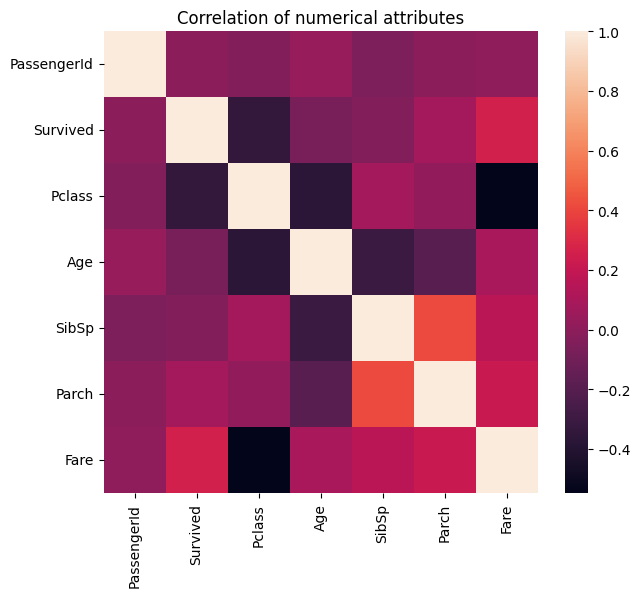

In [22]:
plt.figure(figsize=(7,6))
plt.title('Correlation of numerical attributes', size=12)
correlation = num_features.corr()
sns.heatmap(correlation)

Upon first look:
- Fare and PClass are heavily inversely related. This makes sense because lower PClass value means better class, equating to more expensive fare.
- There is a moderate inverse relationship between Survived and PClass, signifying the better class the passenger is staying in, the higher the survival rate.

One consideration for the data cleaning process is the removal of the "Fare" feature. This is because of the heavy implied relationship between fare and PClass. The two features are correlated and impacts the outcome of "Survived". Having both features in training could over-fit for the PClass/Fare which signify the same thing. Ie. Multicollinearity

### Correlation between numeric features and target

In [23]:
correlation = train_data.select_dtypes(exclude=['object']).corr()
correlation[['Survived']].sort_values(['Survived'], ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


### Scatterplot between numeric features and target

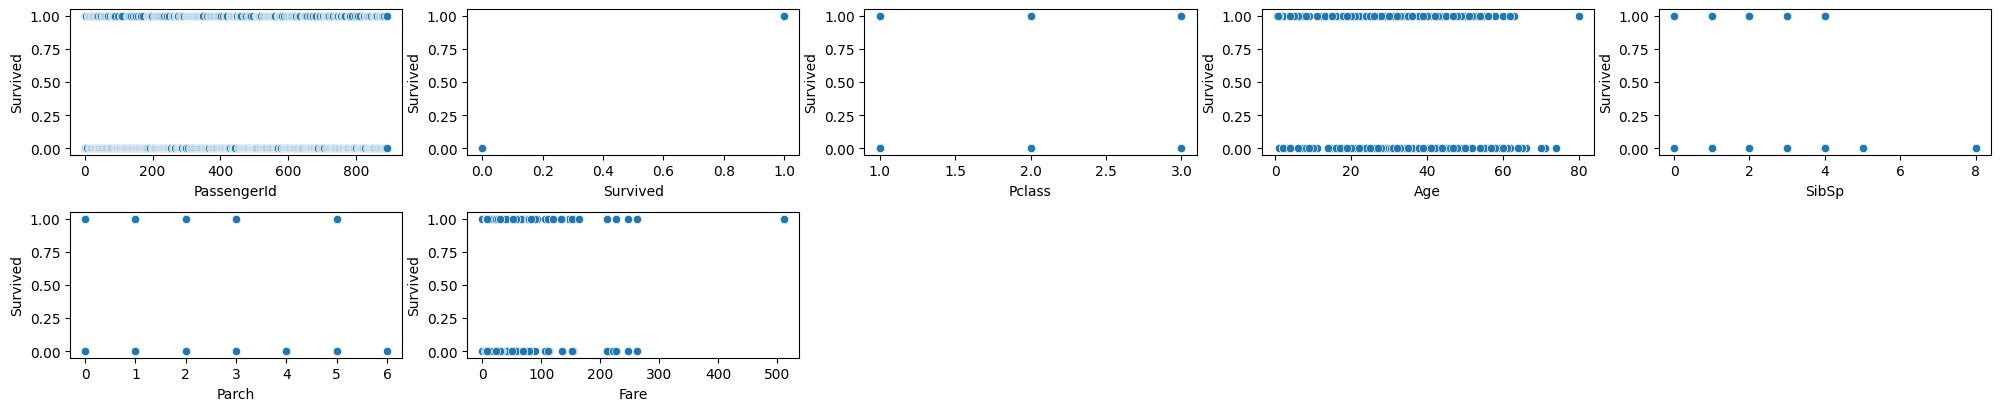

In [24]:
fig = plt.figure(figsize=(20,20))
for index in range(len(num_features.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=num_features.iloc[:,index], y=train_data.Survived, data=num_features.dropna())
fig.tight_layout(pad=1.0)

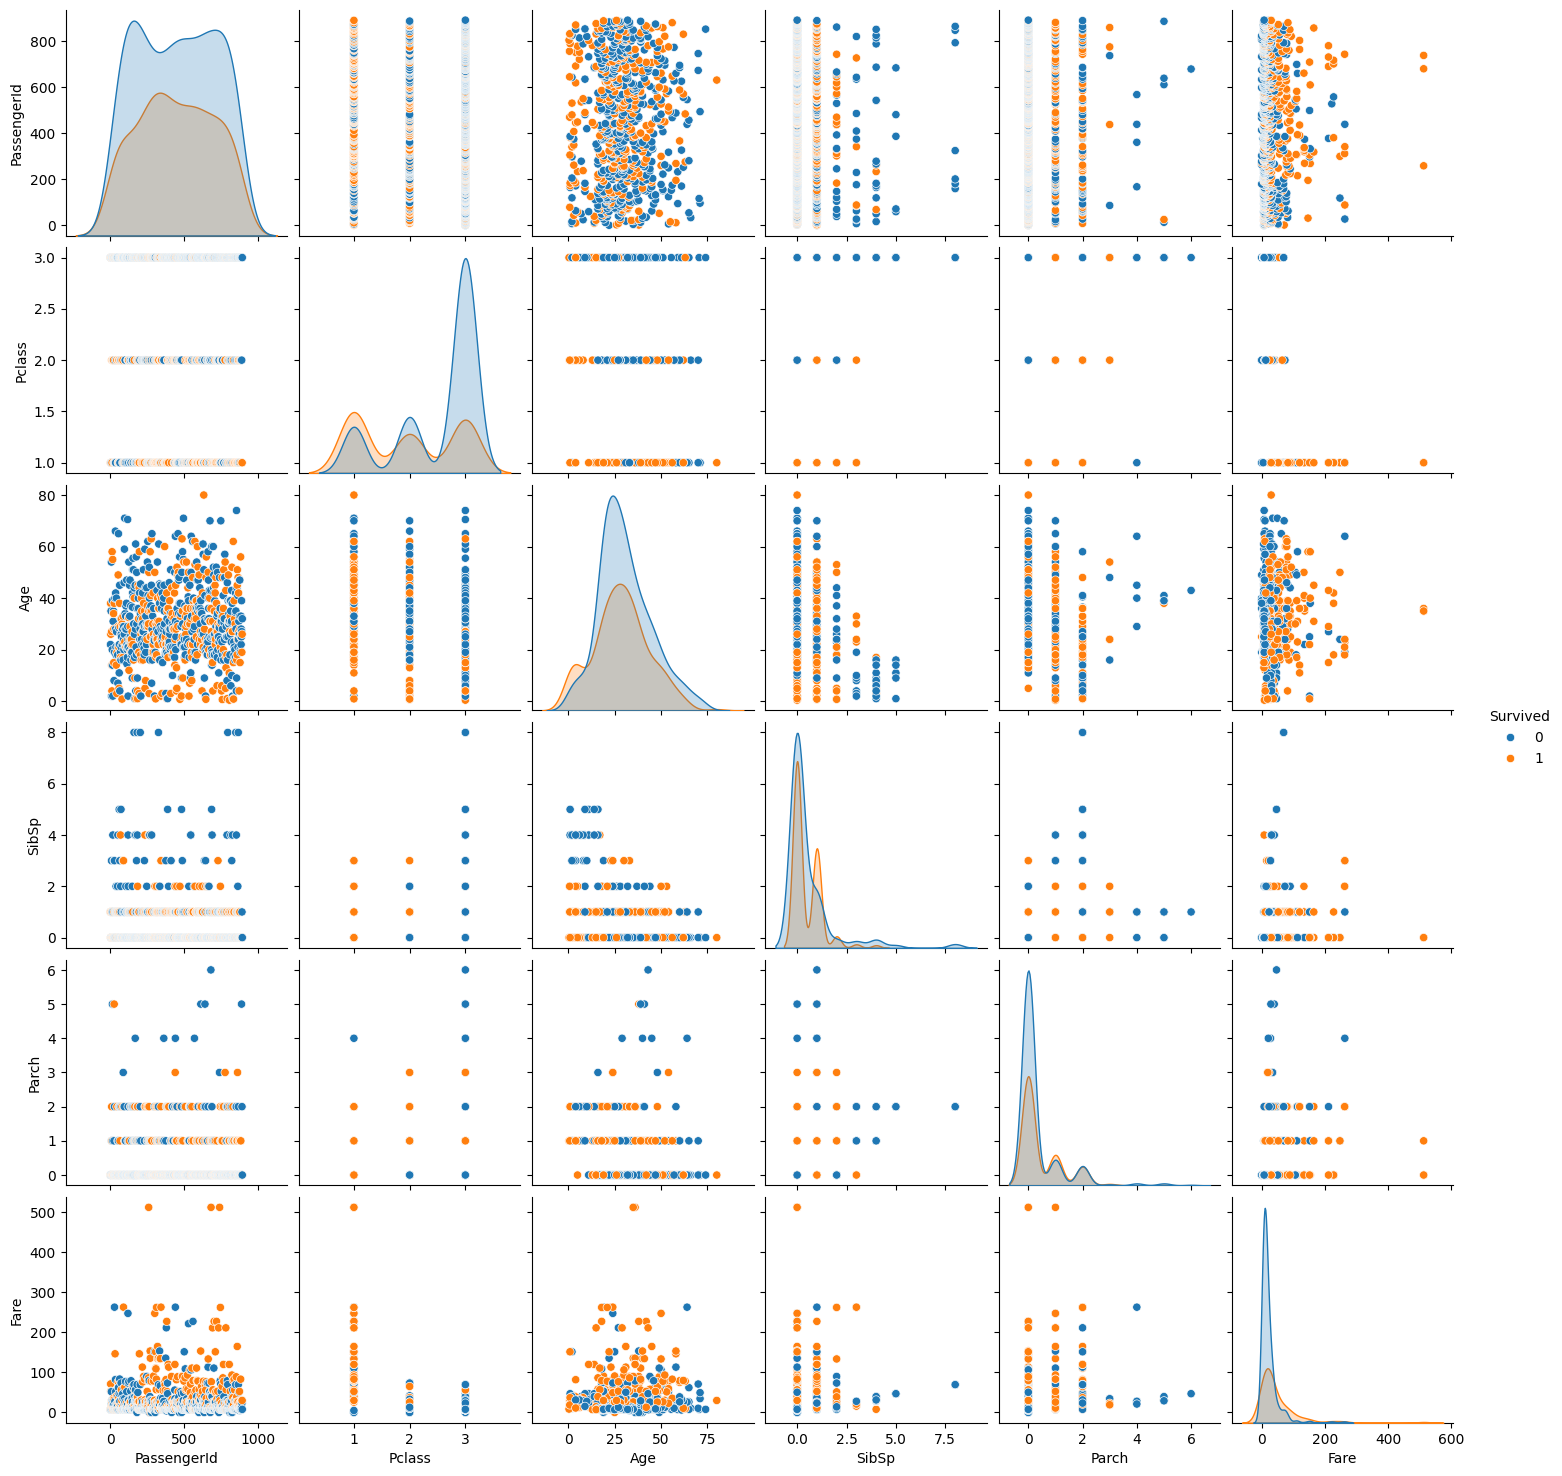

In [25]:
sns.pairplot(train_data, hue="Survived")

# 2. Data Cleaning

Steps I'll take for pre-processing the data for training:
1. Removing redundant features
2. Dealing with outliers
3. Filling in missing data

## 2.1 Removing redundant features

From the correlation matrix, I've identified the following features to be highly correlated:
- Fare and PClass

Removing correlated feature to reduce multicollinearity

Also don't need identifiers columns PassengerId, Ticket, and Name

In [26]:
train_data_copy = train_data.copy()

train_data_copy.drop(['Fare', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

Also removing Cabin column for having too many missing values as stated in section 1.1

In [27]:
train_data_copy.drop(['Cabin'], axis=1, inplace=True)
train_data_copy.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

## 2.2 Dealing with outliers

From before, we noticed 2 outlier points occuring in Fare and SibSp. Since we have remove the Fare feature due to multicollinearity, we only have to deal with the outlier in SibSp.

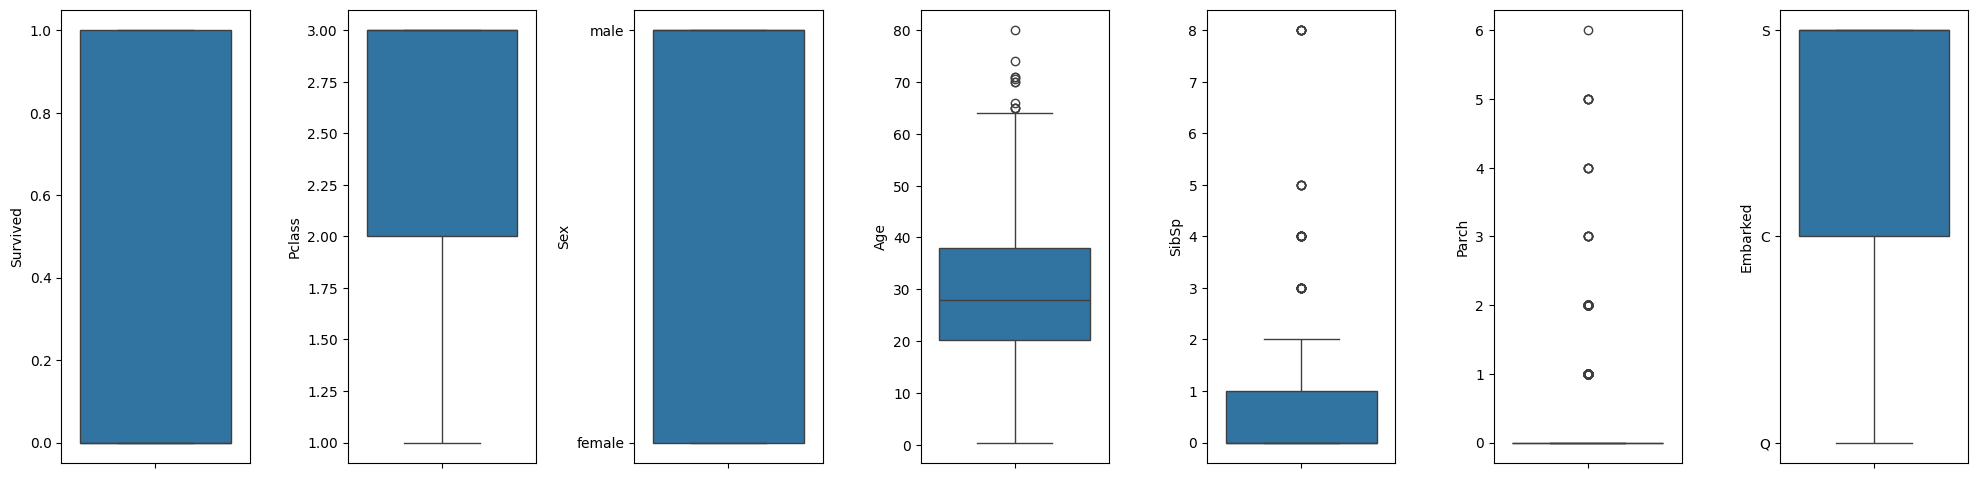

In [28]:
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(train_data_copy.columns):
    plt.subplot(1,7,index+1)
    sns.boxplot(y=col, data=train_data_copy)
fig.tight_layout(pad=1.5)

In [29]:
train_data_copy[train_data_copy['SibSp'] >= 8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
159,0,3,male,NaN,8,2,S
180,0,3,female,NaN,8,2,S
201,0,3,male,NaN,8,2,S
324,0,3,male,NaN,8,2,S
792,0,3,female,NaN,8,2,S
846,0,3,male,NaN,8,2,S
863,0,3,female,NaN,8,2,S


In [30]:
train_data_copy = train_data_copy.drop(train_data_copy[train_data_copy['SibSp'] >= 8].index)

In [31]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Embarked  882 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.2+ KB


## 2.3 Filling in missing values

In [32]:
pd.DataFrame(train_data_copy.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False)

,sum
Age,170
Embarked,2
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0


### Numerical Features

In [33]:
print("Mean of Age: ", train_data_copy['Age'].mean())
print("Median of Age: ", train_data_copy['Age'].median())

Mean of Age:  29.69911764705882
Median of Age:  28.0


As stated in the univariate analysis section, we will be using the median value as the simple method of filling NaNs.

In [34]:
train_data_copy['Age'].fillna(train_data_copy['Age'].median(), inplace=True)
print("Mean of Age: ", train_data_copy['Age'].mean())
print("Median of Age: ", train_data_copy['Age'].median())

Mean of Age:  29.372364253393663
Median of Age:  28.0


The median value has stayed the same while the mean has decreased a little. This is something we have to deal with as the feature is important for training.

### Categorical Features

We will populate the two missing values of Embarked with the most common value.

In [35]:
train_data_copy['Embarked'].value_counts()

Embarked
S    637
C    168
Q     77
Name: count, dtype: int64

In [36]:
train_data_copy['Embarked'].fillna("S", inplace=True)
train_data_copy['Embarked'].value_counts()

Embarked
S    639
C    168
Q     77
Name: count, dtype: int64

In [37]:
train_data_copy.info()
features = train_data_copy.drop('Survived', axis=1).columns.tolist()
features

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       884 non-null    float64
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Embarked  884 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.2+ KB


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

In [38]:
train_data_copy = pd.get_dummies(train_data_copy)

In [39]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    884 non-null    int64  
 1   Pclass      884 non-null    int64  
 2   Age         884 non-null    float64
 3   SibSp       884 non-null    int64  
 4   Parch       884 non-null    int64  
 5   Sex_female  884 non-null    bool   
 6   Sex_male    884 non-null    bool   
 7   Embarked_C  884 non-null    bool   
 8   Embarked_Q  884 non-null    bool   
 9   Embarked_S  884 non-null    bool   
dtypes: bool(5), float64(1), int64(4)
memory usage: 45.8 KB


# 4. Modeling

In [40]:
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier

In [41]:
# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

train_X = train_data_copy.drop('Survived', axis=1)
train_y = train_data_copy[['Survived']]

X_test = pd.get_dummies(test_data[features])

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

rf_model.fit(train_X, train_y)
predictions = rf_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


/Users/mikeyang/Code/Notebooks/.venv/lib/python3.14/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
